<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [17]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np

# range_date
rd = pd.date_range(start ='1/1/2025', end ='2/1/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-31 15:00:00', '2025-01-31 16:00:00',
               '2025-01-31 17:00:00', '2025-01-31 18:00:00',
               '2025-01-31 19:00:00', '2025-01-31 20:00:00',
               '2025-01-31 21:00:00', '2025-01-31 22:00:00',
               '2025-01-31 23:00:00', '2025-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='h')
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
745


In [18]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

,data
datetime,
2025-01-31 20:00:00,27
2025-01-31 21:00:00,54
2025-01-31 22:00:00,71
2025-01-31 23:00:00,26
2025-02-01 00:00:00,60


In [19]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-31']  
print(filtered_df)  


                     data
datetime                 
2025-01-31 00:00:00    78
2025-01-31 01:00:00    43
2025-01-31 02:00:00     2
2025-01-31 03:00:00    75
2025-01-31 04:00:00    82
2025-01-31 05:00:00    55
2025-01-31 06:00:00    14
2025-01-31 07:00:00    73
2025-01-31 08:00:00    33
2025-01-31 09:00:00    44
2025-01-31 10:00:00    63
2025-01-31 11:00:00    95
2025-01-31 12:00:00    94
2025-01-31 13:00:00    29
2025-01-31 14:00:00    84
2025-01-31 15:00:00    18
2025-01-31 16:00:00    10
2025-01-31 17:00:00    25
2025-01-31 18:00:00    66
2025-01-31 19:00:00    55
2025-01-31 20:00:00    27
2025-01-31 21:00:00    54
2025-01-31 22:00:00    71
2025-01-31 23:00:00    26




# Laboratorio 1.0: 

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.



In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(url)
df.head()


,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


2. Definir como indice la columna time.


In [21]:
df = df.set_index("time")
df.head()


,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


3. Obtenga información del data frame.



In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


4. Determine si hay null, nan en el data frame.


In [23]:
df.isnull().sum()


Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64


5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  



In [24]:
df = df.rename(columns={"close": "Close"})
close_df = df[["Close"]]
close_df


,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.



/tmp/ipykernel_24521/4217518002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df["DiffPrice"] = close_df["Close"].diff()


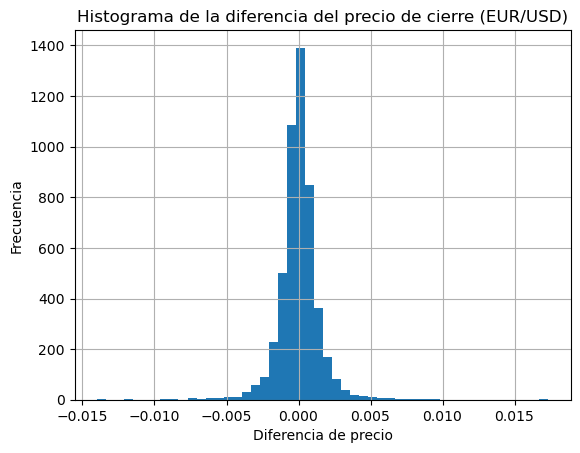

2025-10-13 01:57:53.035 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2025-10-13 01:57:53.684 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721804.561088)
2025-10-13 01:57:54.675 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=923360.482403)
2025-10-13 01:57:54.751 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106676.111621)
2025-10-13 01:57:54.844 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=106500.661168)


(14613.527947910232,
 27360.991772190286,
 -0.20964563672636735,
 0.6022017125608812)

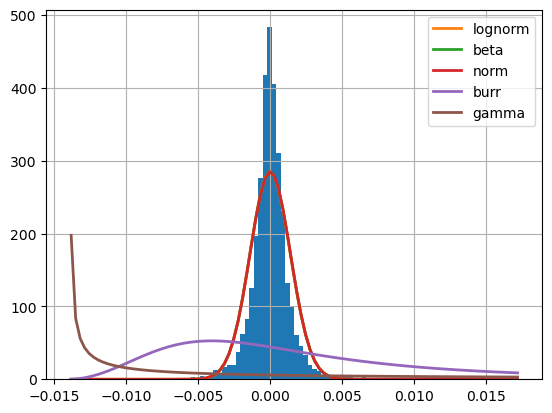

In [25]:
import matplotlib.pyplot as plt
from fitter import Fitter

close_df["DiffPrice"] = close_df["Close"].diff()
close_df = close_df.dropna()

close_df[["Close", "DiffPrice"]].head()

close_df["DiffPrice"].hist(bins=50)
plt.xlabel("Diferencia de precio")
plt.ylabel("Frecuencia")
plt.title("Histograma de la diferencia del precio de cierre (EUR/USD)")
plt.show()

f = Fitter(
    close_df["DiffPrice"],
    distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm']
)
f.fit()
f.summary()

f.get_best(method='sumsquare_error')
f.fitted_param["beta"]



7. Para el data frame, seleccionemos solo los datos del 2023.



In [26]:
df.index = pd.to_datetime(df.index)
df_2023 = df.loc["2023"]
df_2023.head()


,Unnamed: 0,open,high,low,Close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2023-01-02 00:00:00,2722,1.06998,1.07061,1.06795,1.06796,98,57,0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,2723,1.06847,1.06965,1.06847,1.06965,91,183,0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,2724,1.06965,1.07060,1.06904,1.07058,325,11,0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,2725,1.07058,1.07075,1.06837,1.06896,271,26,0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,2726,1.06895,1.06896,1.06799,1.06880,137,78,0,1.068875,-0.00016,-0.00163,-0.000895


8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```


In [27]:
mean_15d = df_2023.groupby(pd.Grouper(freq='15D')).mean()
mean_1w = df_2023.groupby(pd.Grouper(freq='W')).mean()
mean_1m = df_2023.groupby(pd.Grouper(freq='M')).mean()

mean_15d.head(), mean_1w.head(), mean_1m.head()


/tmp/ipykernel_24521/2464154712.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_1m = df_2023.groupby(pd.Grouper(freq='M')).mean()


(            Unnamed: 0      open      high       low     Close  tick_volume  \
 time                                                                          
 2023-01-02      2853.5  1.069313  1.070248  1.068430  1.069361  3503.856061   
 2023-01-17      3117.5  1.085552  1.086401  1.084746  1.085565  3191.670455   
 2023-02-01      3381.5  1.077734  1.078544  1.076861  1.077679  3179.253788   
 2023-02-16      3645.5  1.063187  1.063884  1.062480  1.063150  2926.143939   
 2023-03-03      3909.0  1.063175  1.064041  1.062303  1.063186  3618.418251   
 
                spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  \
 time                                                                       
 2023-01-02  10.181818          0.0       1.069337    0.000047   0.000043   
 2023-01-17   8.973485          0.0       1.085558    0.000015   0.000020   
 2023-02-01   8.863636          0.0       1.077707   -0.000066  -0.000069   
 2023-02-16   8.833333          0.0       1.063169   


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

/tmp/ipykernel_24521/2320933327.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  q = df_2023.groupby(pd.Grouper(freq='M'))


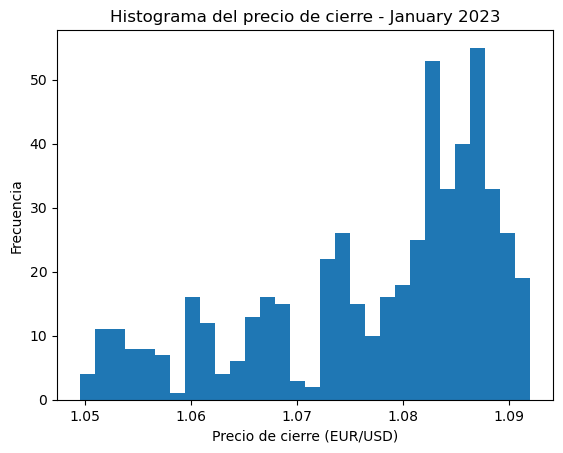

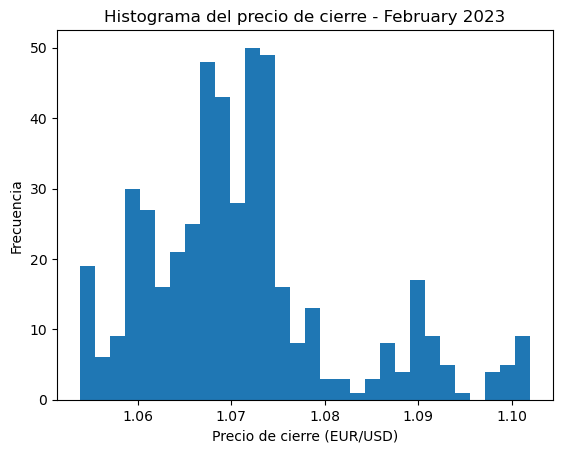

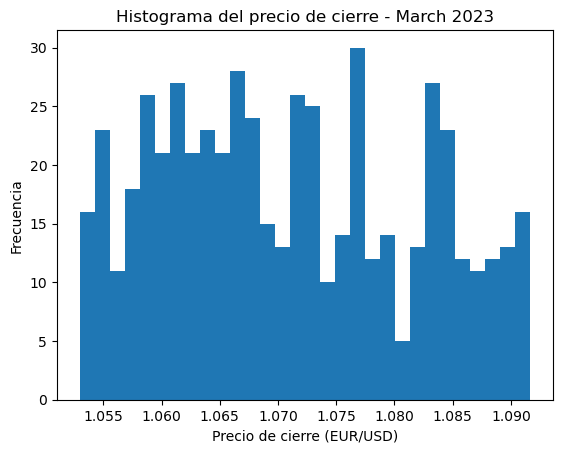

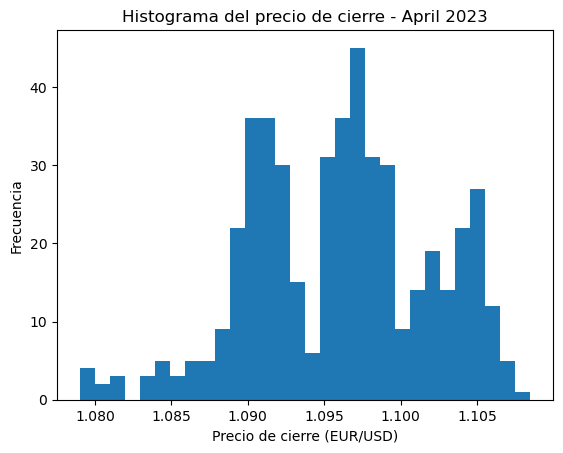

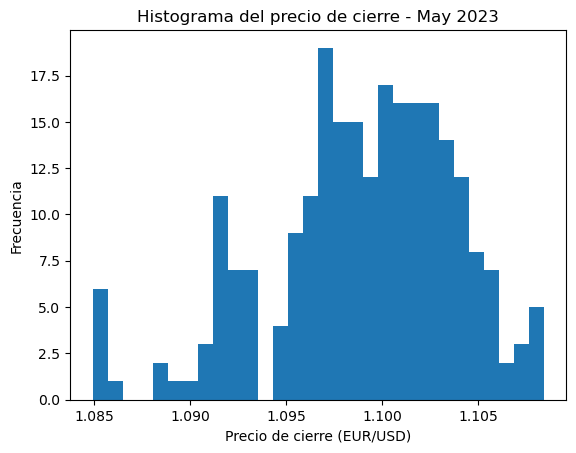

In [28]:

q = df_2023.groupby(pd.Grouper(freq='M'))

for name, group in q:
    plt.figure()
    plt.hist(group["Close"], bins=30)
    plt.title(f"Histograma del precio de cierre - {name.strftime('%B %Y')}")
    plt.xlabel("Precio de cierre (EUR/USD)")
    plt.ylabel("Frecuencia")
    plt.show()
